# Normal Distribution
The Normal distribution-also called the Gaussian distribution-is one of the most important ideas in statistics and probability.  It describes how many natural and human-made measurements tend to cluster around an average value.

Think of it as the mathematical shape of "typical".

### What It Looks Like
- It has the classic bell-shaped curve: high in the middle, tapering smoothly on both sides.
- It is perfectly symmetric around its center.
- The mean, median, and mode are all the same point.

The symmetry means:
- 50% of values lie below the mean
- 50% lie above it.

### Key Parameters
A Normal distribution is fully described by two numbers:

| Parameter | Symbol | Meaning |
|---|---|---|
| Mean | $\mu$ | The center of the distribution |
| Variance | $\sigma^2$ | How spread out the values are |

The standard deviation $\sigma$ is the square root of the variance and controls the width of the bell.

### Probability Density Function (PDF)
The mathematical formual for the Normal distribution is:
$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{(x-\mu)^2}{2\sigma^2}}
$$

### Plot

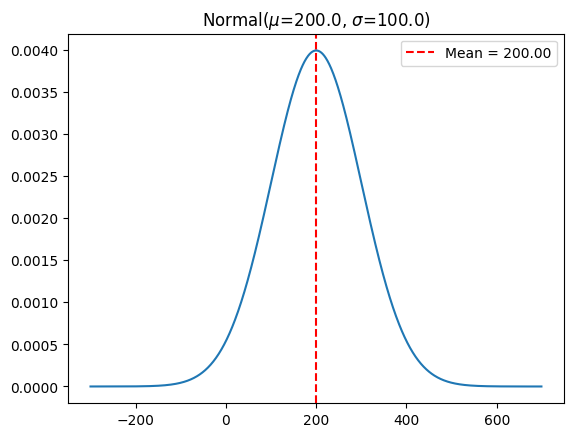

In [37]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

n, p = 400, 0.5
mean = n*p
std = n*p*(1-p)
ks = np.arange(-300, n+300)
ps = [stats.norm.pdf(k, loc=mean, scale=std) for k in ks]
fig, ax = plt.subplots()
ax.axvline(mean, color="r", linestyle="--", label=f"Mean = {mean:.2f}")
ax.plot(ks, ps)
ax.set_title(f"Normal($\\mu$={mean}, $\\sigma$={std})")
plt.legend()
plt.show()

### Cumulative Distribution Function
For a normal random variable $X \sim N(\mu, \sigma^2)$, the cumulative distribution (CDF) is:
$$
F(x) = P(X \leq x) = \frac{1}{\sigma \sqrt{2\pi}} \int_{-\infty}^{x} exp{(- \frac{(t-\mu)^2}{2\sigma^2})}dt
$$

This can be computed in Python in several ways:

#### Using SciPy (recommended)
SciPy provides a highly optimzed implementation of the Normal CDF via `scipy.stats.norm.cdf`.

In [6]:
from scipy.stats import norm

# P(Z <= 0.4)
norm.cdf(0.4)

np.float64(0.6554217416103242)

#### Example (General Normal)

In [2]:
from scipy.stats import norm

# Normal with mean=10, std=2
norm.cdf(12, loc=10, scale=2)

np.float64(0.8413447460685429)

#### Using the Error Function (no SciPy required)
The Normal CDF can be expressed using the error function:
$$
\Phi(x) = \frac{1}{2}[1 + erf(\frac{x}{\sqrt{2}})]
$$

Python's `math.erf` implements this.

In [4]:
import math

def normal_cdf(x):
    return 0.5 * (1 + math.erf(x / math.sqrt(2)))

normal_cdf(0.4)

0.6554217416103242

This gives the same result as SciPy, just with slightly less precision.

### Plotting the CDF

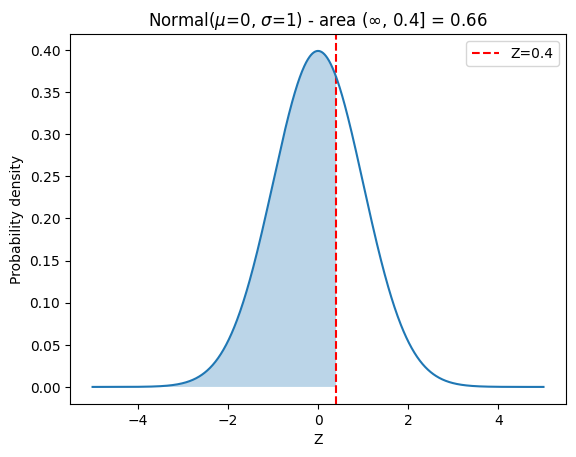

In [26]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

def plot_cdf(z, x_min=-5, x_max=5):
    x = np.linspace(x_min, x_max, 1000)
    pdf = norm.pdf(x)
    cdf_val = norm.cdf(z)

    fig, ax = plt.subplots()
    ax.axvline(z, linestyle="--", color="r", label=f"Z={z}")
    x_shade = np.linspace(x_min, z, 500)
    ax.fill_between(x_shade, norm.pdf(x_shade), alpha=0.3)
    ax.set_title(f"Normal($\\mu$=0, $\\sigma$=1) - area ($\\infty$, {z}] = {cdf_val:.2f}")
    ax.set_xlabel("Z")
    ax.set_ylabel("Probability density")
    ax.plot(x, pdf)
    plt.legend()
    plt.show()

plot_cdf(0.4)